In [1]:
%matplotlib inline
import math, sys, os, numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *

In [2]:
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

# Basic optimal: SGD

In [3]:
def linear(a, b, x): return a*x + b

In [4]:
def dlinear_a(a, b, x): return x
def dlinear_b(a, b, x): return 1

In [5]:
actual_a = 3.0
actual_b = 5.

In [6]:
n = 30
x = random(n)
y = linear(actual_a, actual_b, x)

In [7]:
x[:5],y[:5]

(array([ 0.2627,  0.9676,  0.5802,  0.0368,  0.7708]),
 array([ 5.7881,  7.9028,  6.7405,  5.1104,  7.3124]))

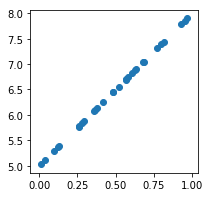

In [8]:
plt.scatter(x, y)

In [22]:
def sse(y, y_pred): return ((y - y_pred)**2).sum()
def msse(y, y_pred): return (sse(y, y_pred) / n)
def loss(y, a, b, x): return sse(y, linear(a, b, x))
def avg_loss(y, a, b, x): return np.sqrt(loss(y, a, b, x)/n)

In [10]:
lr = 0.1
# l = 1/n * sum(y_pred - y)**2
# y_pred = linear(a, b, x)
# dlda = 2/n * (y_pred - y) * dlinear_a(a, b, x)
# dlda = 2/n * (y_pred - y) * dlinear_b(a, b, x)

In [11]:
test1 = random(4)
test2 = random(4)
test3 = test1 * test2
test1, test2, test3, test3.sum()

(array([ 0.1155,  0.5241,  0.947 ,  0.301 ]),
 array([ 0.3456,  0.8145,  0.4866,  0.6205]),
 array([ 0.0399,  0.4269,  0.4609,  0.1868]),
 1.1144)

In [27]:
guess_a = -2.0
guess_b = -10.0
avg_loss(y, guess_a, guess_b, x)

17.4961

In [35]:
guess_a = -2.0
guess_b = -10.0
lr = 0.1 # huge difference when lr = 2.0

loss_history = []
def update():
    global guess_a, guess_b
    y_pred = linear(guess_a, guess_b, x)
    loss_history.append(msse(y, y_pred))
    dlda = 2 / n * ((y_pred - y) * dlinear_a(guess_a, guess_b, x)).sum()
    dldb = 2 / n * ((y_pred - y) * dlinear_b(guess_a, guess_b, x)).sum()
    guess_a -= lr * dlda
    guess_b -= lr * dldb

In [36]:
for i in range(1000):
    update()

In [13]:
fig = plt.figure(dpi = 100, figsize = (5,4))
plt.scatter(x, y)
line, = plt.plot(x, linear(guess_a, guess_b, x))
plt.close()

def animate(i):
    line.set_ydata(linear(guess_a, guess_b, x))
    for i in range(10): update()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)

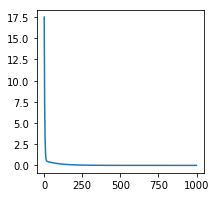

In [37]:
plt.plot(loss_history)